In [8]:
#To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [10]:
# try:
#     from sklearn.datasets import fetch_openml
#     mnist = fetch_openml('mnist_784', version=1, cache=True)
#     mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
#     sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
# except ImportError:
#     from sklearn.datasets import fetch_mldata
#     mnist = fetch_mldata('MNIST original')
# mnist["data"], mnist["target"]

from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='./train-images-idx3-ubyte', 
        labels_path='./train-labels-idx1-ubyte')

In [11]:
X.shape

(60000, 784)

In [12]:
y.shape

(60000,)

In [13]:
28*28

784

Saving figure some_digit_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/classification/some_digit_plot.png'

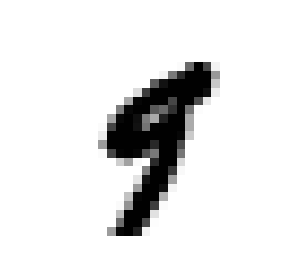

In [14]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

Saving figure even_digit1_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/classification/even_digit1_plot.png'

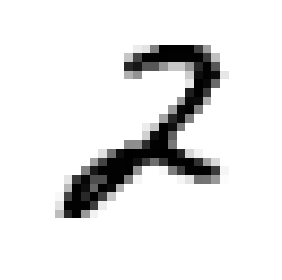

In [15]:
odd_digit1 = X[36000]
even_digit1 = X[36001]
even_digit1_image = even_digit1.reshape(28, 28)
plt.imshow(even_digit1_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("even_digit1_plot")
plt.show()

Saving figure even_digit2_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/classification/even_digit2_plot.png'

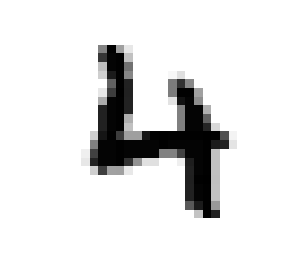

In [16]:
even_digit2 = X[37000]
even_digit2_image = even_digit2.reshape(28, 28)
plt.imshow(even_digit2_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("even_digit2_plot")
plt.show()

In [17]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [18]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/classification/more_digits_plot.png'

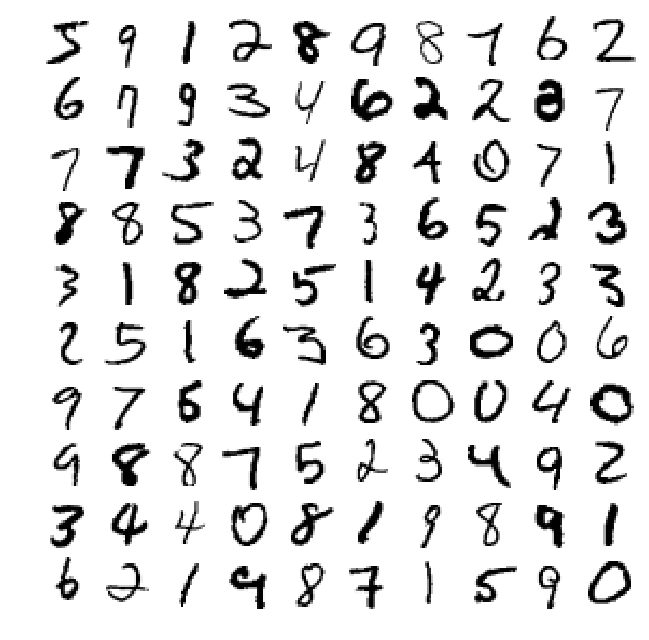

In [19]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [20]:
y[36000]

9

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [22]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [23]:
y_train_5 = (y_train == 0)|(y_train == 2)|(y_train == 4)|(y_train == 6)|(y_train == 8)
y_test_5 = (y_test == 0)|(y_train == 2)|(y_train == 4)|(y_train == 6)|(y_train == 8)

ValueError: operands could not be broadcast together with shapes (0,) (60000,) 

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
sgd_clf.predict([odd_digit1, even_digit1, even_digit2])

array([False,  True,  True])

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.86150692, 0.8226    , 0.76228811])

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.8615069246537673
0.8226
0.7622881144057203


# MultiClass classifier

In [28]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([4], dtype=uint8)

In [29]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-736165.13534356, -391182.59305387, -752094.90919363,
        -199593.6564959 ,  -33428.88555026, -176288.21703149,
        -856742.40238951, -145757.71304016, -253587.97052021,
        -249064.39096412]])

In [30]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [32]:
sgd_clf.classes_[0]

0

In [38]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
prediction = ovo_clf.predict([odd_digit1, even_digit1, even_digit2])

In [41]:
output = []
for number in prediction:
    if number % 2 == 0:
         output.append(True)
    else:
        output.append(False)
output



[False, True, True]

# KNN classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
y_train_even = (y_train % 2 == 0)
y_multilabel = np.c_[y_train_even]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

/Users/wbaron/Quali/py3/lib/python3.4/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
knn_clf.predict([odd_digit1, even_digit1, even_digit2])

array([False,  True,  True])